## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change your present working directory

In [0]:
import os
os.chdir('/content/drive/My Drive/AIML/NLP Stat/Sequence NLP Time/')

### Load your data file

In [0]:
import pandas as pd
import numpy as np

In [0]:
dataset=pd.read_csv('daily-minimum-temperatures-in-me.csv',index_col='Date')

In [68]:
dataset.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


#### Plot data

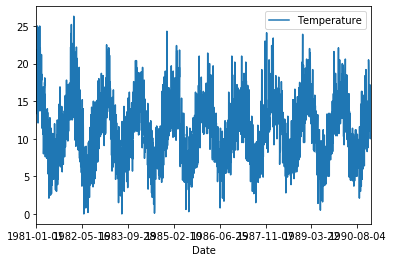

In [69]:
% matplotlib inline
dataset.plot()

#### Descibe your dataframe

In [70]:
dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Temperature,3650.0,11.177753,4.071837,0.0,8.3,11.0,14.0,26.3


From the Describe, we can observe that the Temperature has a standard dev od 4.07 with max and min temp of 0 and 26.3

#### Check for null values

In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
Temperature    3650 non-null float64
dtypes: float64(1)
memory usage: 57.0+ KB


From the info(), we can observe that there are no null nalues present in the dataset

#### Drop null values

In [72]:
dataset.dropna()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


#### Get the representation of the distribution of data in the form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feab0f998d0>]],
      dtype=object)

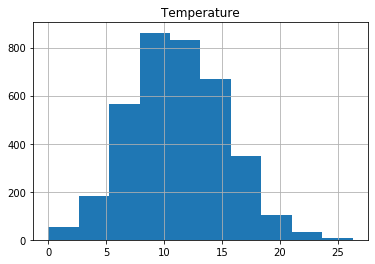

In [73]:
dataset.hist()

From the histogram, we can observe that the temp dataset is right skewed

#### Check the maximum and minimum values

In [74]:
print('Max temperature is:',dataset['Temperature'].max(),'\nMin temperature is:', dataset['Temperature'].min())

Max temperature is: 26.3 
Min temperature is: 0.0


### Normalize the data

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)
temp_dataset=pd.DataFrame(transformer.transform(dataset),columns=['Temperature'],index=dataset.index)

In [222]:
temp_dataset.head()

,Temperature
Date,
1981-01-01,0.787072
1981-01-02,0.680608
1981-01-03,0.714829
1981-01-04,0.555133
1981-01-05,0.600760


In [223]:
temp_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,3650.0,0.42501,0.154823,0.0,0.315589,0.418251,0.532319,1.0


#### Check the maximum and minimum values of scaled data

In [224]:
print('Max temperature is:',tamp_dataset['Temperature'].max(),'\nMin temperature is:', tamp_dataset['Temperature'].min())

Max temperature is: 1.0 
Min temperature is: 0.0


#### Look into some of the scaled values

In [225]:
temp_dataset.head()

,Temperature
Date,
1981-01-01,0.787072
1981-01-02,0.680608
1981-01-03,0.714829
1981-01-04,0.555133
1981-01-05,0.600760


### Split data into Training and Testing

In [0]:
#Considering 70:30 for the train and test
train_data = temp_dataset[:int((len(temp_dataset))*.70)] 
test_data = temp_dataset[int(len(temp_dataset)*.70):]

#### Print train and test size

In [227]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,2555.0,0.417566,0.155475,0.0,0.307985,0.414449,0.520913,1.0


In [228]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,1095.0,0.442377,0.151949,0.019011,0.326996,0.441065,0.551331,0.908745


In [229]:
print('Train set:',len(train_data),'\nTest set:', len(test_data))

Train set: 2555 
Test set: 1095


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
def add_col(dffile):
  dffile['Nexttemp']=dffile['Temperature'].shift(-1)
  dffile=dffile[:-1]

#### Use function to get training and test set

In [231]:
add_col(train_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [232]:
train_data=train_data[:-1]
train_data.tail()

,Temperature,Nexttemp
Date,,
1987-12-26,0.482890,0.615970
1987-12-27,0.615970,0.539924
1987-12-28,0.539924,0.543726
1987-12-29,0.543726,0.505703
1987-12-30,0.505703,0.634981


In [233]:
add_col(test_data)
test_data=test_data[:-1]
test_data.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Temperature,Nexttemp
Date,,
1990-12-26,0.555133,0.532319
1990-12-27,0.532319,0.517110
1990-12-28,0.517110,0.513308
1990-12-29,0.513308,0.596958
1990-12-30,0.596958,0.494297


#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [0]:
x_train=train_data['Temperature']
y_train=train_data['Nexttemp']
x_test=test_data['Temperature']
y_test=test_data['Nexttemp']

In [0]:
x_train=np.reshape(np.array(x_train),(len(x_train),1,1))
x_test=np.reshape(np.array(x_test),(len(x_test),1,1))

In [236]:
len(x_train)

2554

## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [0]:
import tensorflow as tf
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(1, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

### Summarize your model

In [238]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [239]:
model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=32)

Train on 2554 samples, validate on 1094 samples
Epoch 1/100
2554/2554 [==============================] - 1s 359us/sample - loss: 0.1305 - val_loss: 0.0535
Epoch 2/100
2554/2554 [==============================] - 0s 126us/sample - loss: 0.0237 - val_loss: 0.0158
Epoch 3/100
2554/2554 [==============================] - 0s 128us/sample - loss: 0.0162 - val_loss: 0.0145
Epoch 4/100
2554/2554 [==============================] - 0s 108us/sample - loss: 0.0152 - val_loss: 0.0136
Epoch 5/100
2554/2554 [==============================] - 0s 107us/sample - loss: 0.0142 - val_loss: 0.0124
Epoch 6/100
2554/2554 [==============================] - 0s 108us/sample - loss: 0.0132 - val_loss: 0.0117
Epoch 7/100
2554/2554 [==============================] - 0s 109us/sample - loss: 0.0124 - val_loss: 0.0107
Epoch 8/100
2554/2554 [==============================] - 0s 106us/sample - loss: 0.0116 - val_loss: 0.0102
Epoch 9/100
2554/2554 [==============================] - 0s 110us/sample - loss: 0.0111 - val_lo

## Make Predictions and Evaluate your model

In [0]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

In [0]:
trainPredict = transformer.inverse_transform(trainPredict)
testPredict = transformer.inverse_transform(testPredict)

## Plot the results

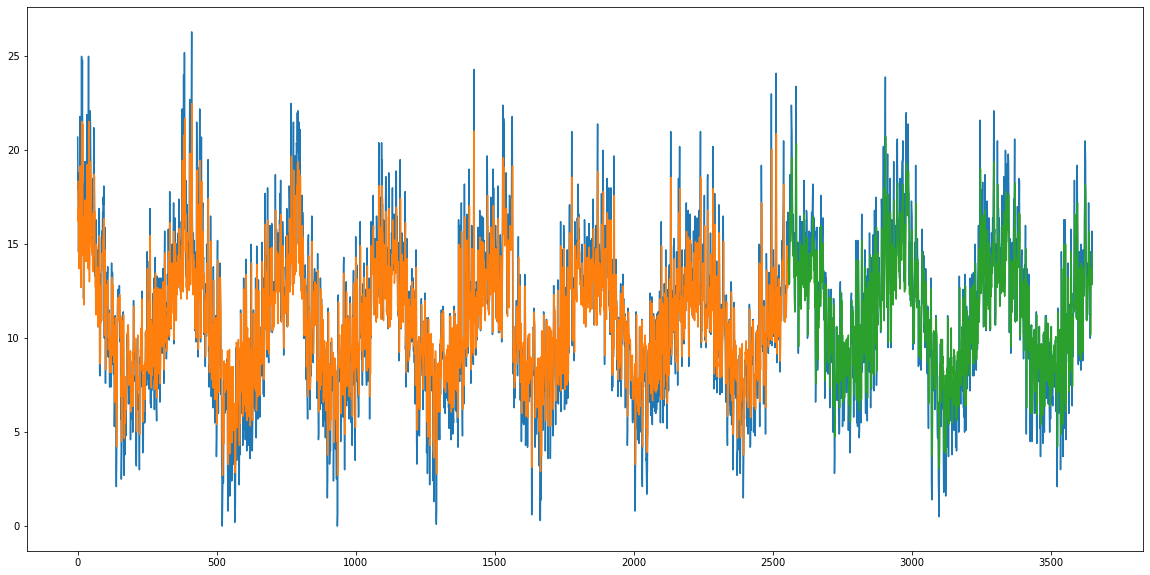

In [244]:
import matplotlib.pyplot as plt
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[1:len(trainPredict)+1, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(1*2):len(scaled), :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()